In [ ]:
options(repr.plot.width=8, repr.plot.height=5)
options(jupyter.rich_display = FALSE)

# Basic plotting
* Simple scatterplots
* Line plots
* Function plotting
* Histograms

## Simple scatter plots

* Scatter plots and line plots are created with the `plot` command. (Use `help(plot)` for detailed description.)
* Simplest use: `plot(y)` or `plot(x,y)`.

In [ ]:
plot(c(1,3,5,4,6))

A plot with separate x and y coordinate vectors

In [ ]:
plot(c(-2, -1.5, 0, 1.7, 2.3), c(1,3,5,4,6))

## Plotting a mathematical expression

In [ ]:
x <- -5:5
y <- x^2
plot(x, x^2 -1)

## Change the axis labels and the title

In [ ]:
heights <- c(1.70, 1.67, 1.75, 1.62, 1.81)
weights <- c(65, 70, 66, 61, 85)
plot(heights, weights, xlab="height (m)", ylab="weight (kg)")
title("Weight vs. height")

## Change the marker shape and color

In [ ]:
plot(heights, weights, pch=4, col="red", xlab="height (m)", ylab="weight (kg)")
title("Weight vs. height")

For details of setting the marker shape, size, and color see this document: https://www.statmethods.net/advgraphs/parameters.html

## Pause to think

Given the variables
    
    x <- -5:5
    y <- 1 - x^2 / 25
 
which of the following options can be used to generate the following plot?
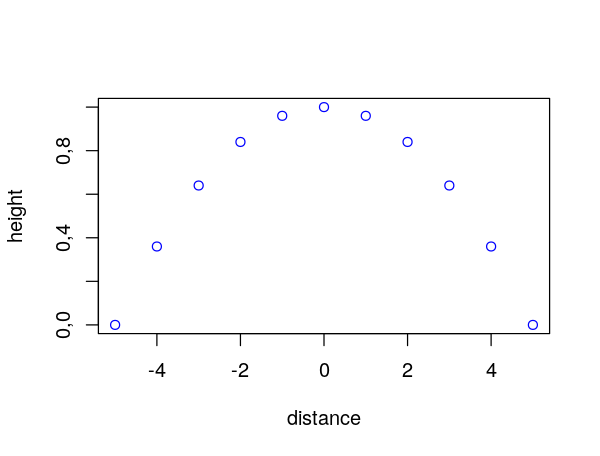

    (A) plot(x, y, col="blue", xlab="distance", ylab="height")
    (B) plot(y, x, col="blue", xlab="height", ylab="distance")
    (C) plot(x, y, col="red", xlab="distance")
    (D) plot(x, y, col="blue")

## Line plots

In [ ]:
heights <- c(1.70, 1.67, 1.75, 1.62, 1.81)
weights <- c(65, 70, 66, 61, 85)
plot(heights, weights, type="l")

In this particular case, ordering with respect to heights produces a more pleasing plot.

In [ ]:
plot(sort(heights), weights[order(heights)], type="l")

## Function plotting

Plot the function $y(x) = \mathrm{e}^{-0.1x^2}\sin(x)$.

In [ ]:
x <- seq(-10, 10, length.out = 100)
y <- exp(-0.1*x^2)*sin(x)
plot(x, y, type="l", col="darkgreen")
title("A function")

## Plotting two functions together

Plot the functions $y_1(x) = \mathrm{e}^{-0.1x^2}\sin(x)$ and $y_2(x) = \sin(x)$ on the same graph.

In [ ]:
x <- seq(-10,10, length.out = 300)
y1 <- exp(-0.1*x^2)*sin(x)
y2 <- sin(x)
plot(x,y1, type="l", col="red")
points(x,y2, type="l", col="blue")
title("Two functions")

The y-axis limits are set according to the first plot, so the second plot appears cropped. To fix this, let's set the limits manually.

In [ ]:
plot(x, y1, ylim=c(-1.1, 1.1), type="l", col="red")
points(x, y2, type="l", col="blue")
title("Two functions")

## Histograms
A histogram divides the range of the data into "bins", displays the count of points in each bin.

In [ ]:
x <- c(rep(17,4), rep(18,7), rep(19,5), rep(20,5), rep(21,4))  # rep(17,4) -> (17,17,17,17)
hist(x, col="blue")

Specify the break points of the histogram:

In [ ]:
hist(x, col="red", breaks=15:22)

Show the density instead of bin counts:

In [ ]:
hist(x, col="skyblue", breaks=15:22, freq=F)

## Exercises

(1) Reproduce the scatterplot of the weights vector versus the heights vector, changing the markers to green filled circles.

(2) Pick five different functions from your MATH 101 book and plot them.



(3) The *Taylor expansion* of a function is a polynomial approximation to that function around a chosen point. For example, the Taylor expansion to $\sin(x)$ around $x=0$ is the infinite series:
$$ \sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$.

When we stop the terms at some points, the resulting polynomial becomes an approximation to $\sin(x)$ around $x=0$. For example, if we use only the first term, our approximation is:
$$\sin(x)\approx x$$
If we use the first two terms, the approximation has less error:
$$\sin(x)\approx x - \frac{x^3}{3!}$$
etc.

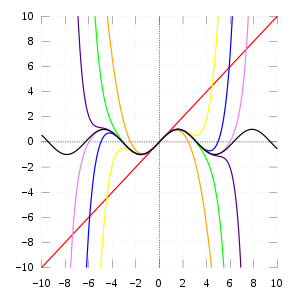


Plot the sine function from $x=-4$ to $x=4$ in red, and then plot each approximation, up to four terms, on the same frame. Observe how the subsequent polynomials converge to the sine function.

# Pseudorandom number generation
* Uniformly distributed random numbers
* Normally distributed random numbers
* Generating synthetic data
* Random seed
* Choosing a random element in a vector
* Simulating coin tosses and dice throws
* Estimating $\pi$ with random numbers

# Uniformly distributed random numbers
Uniformly distributed random numbers are generated with `runif(n, min, max)`. Default parameters are `n=1, min=0, max=1`.

In [ ]:
runif(20,-1,1) # 20 random numbers, uniformly distributed between -1 and 1.

# Normally distributed random numbers

Another common distribution is the _Normal_ or _Gaussian_ distribution (a.k.a. the *bell curve*). Normally distributed random numbers are generated with the `rnorm(n,mean,sd)` function. Default parameter values are `n=1, mean=0, sd=1`.

In [ ]:
rnorm(20)

# Comparison of distributions

In [ ]:
options(repr.plot.width=8, repr.plot.height=3)
plot(runif(1000,-1,1)); title("Uniformly distributed numbers")
plot(rnorm(1000)); title("Normally distributed numbers, sd=1")
plot(rnorm(1000,sd=10)); title("Normally distributed numbers, sd=10")

Plot the histograms of the random samples.

In [ ]:
hist(runif(1000,-1,1), breaks=25, main="Uniformly distributed numbers")
hist(rnorm(1000), breaks=25,main="Normally distributed numbers")

Note that the distributions are not perfectly smooth. The reason is that our random sample is finite. As we draw more and more samples, the histogram will approach the theoretical distribution.

In [ ]:
hist(runif(100000,-1,1), breaks=25, main="Uniformly distributed numbers")
hist(rnorm(100000), breaks=25, main="Normally distributed numbers")

## Pause to think

Which command generates numbers with the largest "spread"?

    (A) rnorm(1000, mean=0, sd=1)
    (B) rnorm(10000, mean=0, sd=1)
    (C) rnorm(1000, mean=0, sd=10)
    (D) rnorm(1000, mean=10, sd=1)

## Generating "synthetic data"

By adding random "noise" to deterministic vectors, we can simulate a real-life data set where the underlying "law" is $y=x$.

In [ ]:
x <- seq(0,10, length.out = 100)
y <- x + rnorm(100, sd=0.5)
plot(x,y)

Getting the same random sequence
---
In some cases we want to get the same random sequence in every simulation, so that we can identify and correct errors. For that, we can set the _seed_ of the random number generator to a fixed number.

In [ ]:
set.seed(123)
runif(10,-1,1)
set.seed(123)
runif(10,-1,1)

## Choosing a vector element randomly
The `sample` function allows us to selected elements randomly from a given vector.

By default, it chooses elements *without replacement*. So, an element is chosen at most once.

In [ ]:
x <- 11:20
sample(x)

To choose elements *with replacement*, we set the `replace` parameter to `TRUE`.

In [ ]:
sample(x, 10, replace = TRUE)

Coin toss experiment
---

In [ ]:
tosses <- sample(c("H","T"),10,replace = TRUE)
tosses

We throw a coin 10 times. How many heads do we get on average?

The number of heads in one experiment (10 throws):

In [ ]:
sum(tosses=="H")

This number changes every time due to the randomness:

In [ ]:
tosses <- sample(c("H","T"),10,replace = TRUE)
sum(tosses=="H")

In order to get the expected number of heads, we need to repeat the experiment many times and average over the outcomes. (See "loops" later.)

Suppose you gamble with a coin: You gain 1 TL if it comes heads, and lose 1 TL otherwise. You repeat the coin toss 5 times. What is your balance at every step of the game?

Our gain is +1 if heads, and -1 if tails. To simplify the accounting, let us sample in (-1,1) and get the cumulative sum.

In [ ]:
outcomes <- sample(c(-1,1), 5, replace=TRUE)
outcomes
cumsum(outcomes)

Repeat the coin toss 100 times. The balance looks as follows.

In [ ]:
options(repr.plot.width=10, repr.plot.height=4)
x <- cumsum(sample(c(-1,1), 100, replace=TRUE))
plot(x, type="o")

This is called a _random walk_.

Throwing dice
---

In [ ]:
d1 <- sample(1:6, 10, replace=TRUE)
d2 <- sample(1:6, 10, replace=TRUE)
d1
d2

Simulating the outcome of a pair of dice:

In [ ]:
d1 + d2

Now throw two dice 1000 times and plot a histogram of the total outcomes.

In [ ]:
d1 <- sample(1:6, 1000, replace=TRUE)
d2 <- sample(1:6, 1000, replace=TRUE)

In [ ]:
hist(d1+d2, breaks = 1:12)

## Pause to think

Suppose we throw a single die 100 times. Which of the following can be used to count how many times a six comes up?

    (A) sum(sample(c("H","T"),100, replace = TRUE)=="6")
    
    (B) sum(sample(1:6, 100, replace = TRUE) == 6)
    
    (C) sum(sample(1:100, 6, replace = TRUE) == 6)
    
    (D) sum(sample(1:6, 100) == 6)

Estimating pi
---

Suppose we generate random number pairs $(x,y)$ within the square $-1\leq x\leq 1$ and $-1\leq y\leq 1$. Some of them fall inside the inscribed circle $x^2 + y^2 \leq 1$. 

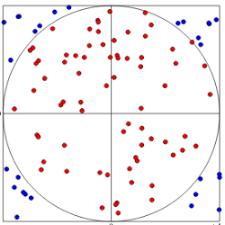

The area of the circle is $\pi$ and the area of the square is 4, so the ratio (points inside the circle) / (points inside the square) gives an estimate of $\pi/4$.

In [ ]:
x <- runif(100,-1,1)
y <- runif(100,-1,1)

In [ ]:
options(repr.plot.width=4, repr.plot.height=4)
# plot the random points:
plot(x, y, asp=1)
# plot the unit circle:
t <- seq(0,2*pi, length.out=100)
xx <- cos(t)
yy <- sin(t)
lines(xx,yy,lwd = 3,col="red")

Let's estimate pi with this run:

In [ ]:
4*sum(x^2 + y^2 <= 1)/length(x)

With a new set of random hits, the estimate will differ:

In [ ]:
x <- runif(100,-1,1)
y <- runif(100,-1,1)
4*sum(x^2 + y^2 < 1)/length(x)

## Exercises

(1) Write an R expression that simulates the outcome of the 6/49 Lottery (Sayısal Loto), where one draws 6 numbers from 1, 2, ..., 49. Note that the same number cannot appear twice in one drawing.

(2) Generate 1000 random numbers, drawn from the normal distribution with standard deviation 2, and another 1000 with standard deviation 0.5. Plot the histogram for each set of numbers. What can you say about the effect of the standard deviation?

(3) Throw 10 coins and count the number of heads. Repeat this experiment ten times, and find the mean of the number of heads.

(4) Throw 3 dice 10000 times. Plot the histogram of the outcomes (outcomes should be between 3 and 18).